In [17]:
#%matplotlib inline
from pylab import *
from acceptance import acceptance_sim

# Assume a maximum altitude of the UHECR of 10 km and a 10 degree view angle cutoff, 
# so for a given zenith angle th_z, the radius of the area to be considered is 10 km * (tan(thz+10 deg) - tan(10 deg))

thz = np.arange(0., 85., 2.5)

rad = 10.*(np.tan((thz+9.9)*np.pi/180.) - np.tan(thz*np.pi/180.))
for k in range(0,len(thz)):
    th_val = thz[k] + 2.5
    dA_0 = 2. * np.pi * np.sin(th_val*np.pi/180.) * np.cos(th_val*np.pi/180.) * np.pi * rad[k]**2
    print('%1.1f\t%1.1f\t%1.1f'%(thz[k], rad[k], dA_0))


0.0	1.7	2.6
2.5	1.8	5.3
5.0	1.8	8.1
7.5	1.8	11.1
10.0	1.9	14.4
12.5	1.9	17.9
15.0	2.0	21.8
17.5	2.0	26.2
20.0	2.1	31.1
22.5	2.2	36.7
25.0	2.3	43.3
27.5	2.4	50.9
30.0	2.6	59.9
32.5	2.8	70.7
35.0	3.0	83.7
37.5	3.2	99.6
40.0	3.5	119.4
42.5	3.8	144.2
45.0	4.2	175.8
47.5	4.7	216.9
50.0	5.3	271.2
52.5	6.1	344.6
55.0	7.1	446.6
57.5	8.3	592.6
60.0	10.0	809.4
62.5	12.3	1146.5
65.0	15.6	1702.0
67.5	20.6	2690.9
70.0	28.7	4651.5
72.5	43.2	9222.6
75.0	74.7	23292.0
77.5	175.1	103507.9
80.0	5672.9	82205334.8
82.5	-314.6	169570.5


<Figure size 432x288 with 0 Axes>

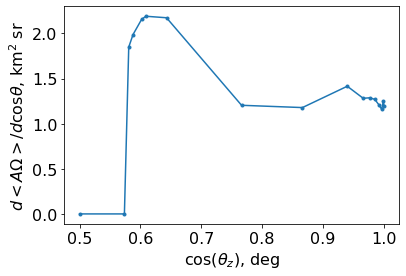

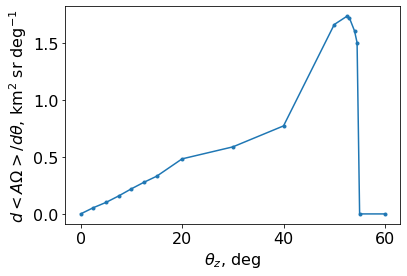

<Figure size 432x288 with 0 Axes>

In [18]:
rcParams['font.size'] = 16
# 10^17 eV
th_z     = np.array([0.,   2.5,  5.0,  7.5,  10.,  12.5, 15.,  20.,  30.,  40., 50., 52.5, 53., 54., 54.5, 55., 60.])
rad      = np.array([1.7,  1.8,  1.8,  1.8,  1.9,  1.9,  2.0,  2.1,  2.6,  3.5, 5.3, 6.1, 7.1, 7.1, 7.1, 7.1, 10.])
eff_1e4  = np.array([210., 196., 182., 191., 181., 185., 168., 173., 102., 65., 61., 49., 36., 34., 32., 0.,  0.])

dA_0 = 2. * np.pi * np.cos(th_z*np.pi/180.) * np.pi * rad**2

#plot(th_z, dA_0)
figure(1)
plot(np.cos(th_z*pi/180.), dA_0*eff_1e4*1.e-4, '.-')
ylabel(r'$d<A\Omega>/d\cos\theta$, km$^2$ sr')
xlabel(r'$\cos(\theta_z)$, deg')
figure(2)
plot(th_z, np.sin(th_z*np.pi/180.)*dA_0*eff_1e4*1.e-4, '.-')
xlabel(r'$\theta_z$, deg')
ylabel(r'$d<A\Omega>/d\theta$, km$^2$ sr deg$^{-1}$')

figure(3)


cos_thz [1.   0.95 0.9  0.85 0.8  0.75 0.7  0.65 0.6  0.55 0.5  0.45 0.4  0.35
 0.3  0.25]


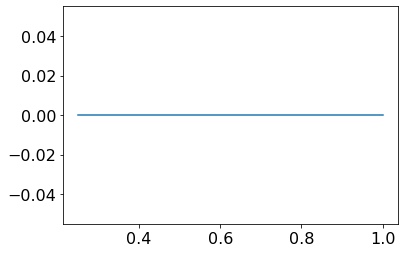

In [19]:
cos_thz = np.arange(1., 0.2, -0.05)
print('cos_thz', cos_thz)
log10_energy = 17.
thz = np.arccos(cos_thz)*180./pi
rad = 10.*(np.tan((thz+9.9)*np.pi/180.) - np.tan(thz*np.pi/180.))
eff = np.zeros(len(cos_thz))
dA_0_dcos_th = np.zeros(len(cos_thz))
for k in range(0,len(cos_thz)):
    continue
    dA_0_dcos_th[k] = 2. * np.pi * cos_thz[k] * np.pi * rad[k]**2
    
    eff_val, thz_array, flat_res = acceptance_sim(radius_km = rad[k],
                  num_particles = 1000,
                  zenith_angle_deg = thz[k],
                  log10_energy = log10_energy)
    eff[k] = eff_vals
    print('%1.2f\t%1.2f\t%1.1f\t%1.2e\t%1.2e\t%1.2e'%(cos_thz[k], thz[k], rad[k], dA_0_dcos_th[k], eff[k], dA_0_dcos_th[k]*eff[k]))

plot(cos_thz, dA_0_dcos_th*eff)

In [20]:
print(np.sum(dA_0_dcos_th*eff*0.05))

0.0


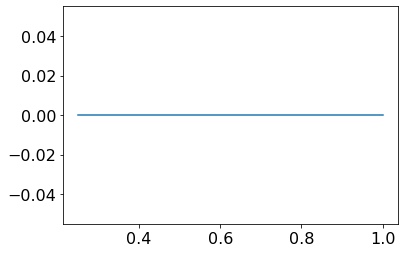

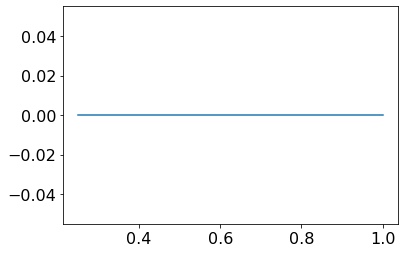

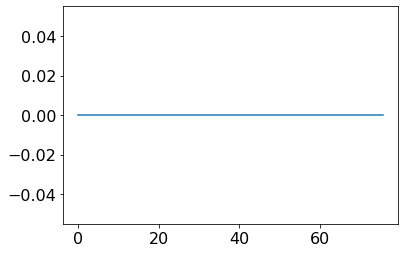

In [21]:
figure(1)
plot(cos_thz, dA_0_dcos_th)
figure(2)
plot(cos_thz, eff)
figure(3)
plot(thz, dA_0_dcos_th*eff*np.sin(thz*pi/180.))


In [22]:
print(acceptance_sim(radius_km = 1.,
                     num_particles = 100,
                     zenith_angle_deg = None,
                     log10_energy = 17.,
                     verbose = False))
print(pi*pi*1.**2)

(0.02, array([41.6770887 , 35.01092937]), array([[0.        , 0.00021056],
       [0.00149418, 0.00539351]]))
9.869604401089358


In [23]:
#print symbol_that_does_not_exist

In [24]:
'''
print acceptance_sim(radius_km = 20.,
                  num_particles = 10000,
                  zenith_angle_deg = None,
                  log10_energy = 17.)
'''


'\nprint acceptance_sim(radius_km = 20.,\n                  num_particles = 10000,\n                  zenith_angle_deg = None,\n                  log10_energy = 17.)\n'

In [25]:
'''
print acceptance_sim(radius_km = 5.,
                  num_particles = 10000,
                  zenith_angle_deg = None,
                  log10_energy = 17.)
'''

'\nprint acceptance_sim(radius_km = 5.,\n                  num_particles = 10000,\n                  zenith_angle_deg = None,\n                  log10_energy = 17.)\n'

In [26]:
'''
print acceptance_sim(radius_km = 4.,
                     num_particles = 10000,
                     zenith_angle_deg = None,
                     log10_energy = 18., 
                     verbose = True)
'''


'\nprint acceptance_sim(radius_km = 4.,\n                     num_particles = 10000,\n                     zenith_angle_deg = None,\n                     log10_energy = 18., \n                     verbose = True)\n'

16.6 0.7, 5.30e-04 4.72e+00 2.50e-03 0.00e+00
16.7 0.8, 3.17e-03 5.68e+00 1.80e-02 0.00e+00
16.8 0.8, 6.51e-03 6.83e+00 4.45e-02 0.00e+00
16.9 0.9, 1.03e-02 8.21e+00 8.47e-02 0.00e+00
17.0 1.0, 1.61e-02 9.87e+00 1.59e-01 0.00e+00
17.1 1.1, 2.30e-02 1.19e+01 2.73e-01 0.00e+00
17.2 1.2, 3.21e-02 1.43e+01 4.58e-01 0.00e+00
17.3 1.3, 4.21e-02 1.72e+01 7.22e-01 0.00e+00
17.4 1.4, 5.18e-02 2.06e+01 1.07e+00 0.00e+00
17.5 1.6, 5.93e-02 2.48e+01 1.47e+00 0.00e+00
17.6 1.7, 6.32e-02 2.98e+01 1.88e+00 0.00e+00
17.7 1.9, 6.62e-02 3.58e+01 2.37e+00 3.58e-04
17.8 2.1, 6.26e-02 4.31e+01 2.70e+00 0.00e+00
17.9 2.3, 6.16e-02 5.18e+01 3.19e+00 2.07e-03
18.0 2.5, 5.84e-02 6.23e+01 3.64e+00 6.23e-04
18.1 2.8, 5.34e-02 7.49e+01 4.00e+00 4.49e-03
18.2 3.0, 4.95e-02 9.00e+01 4.45e+00 1.80e-03
18.3 3.3, 4.62e-02 1.08e+02 5.00e+00 0.00e+00
18.4 3.6, 4.11e-02 1.30e+02 5.34e+00 5.20e-03
18.5 4.0, 3.59e-02 1.56e+02 5.62e+00 4.69e-03


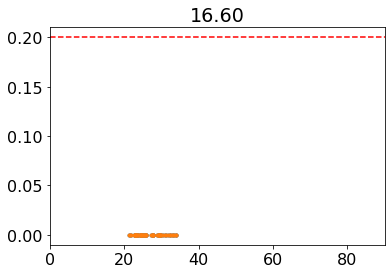

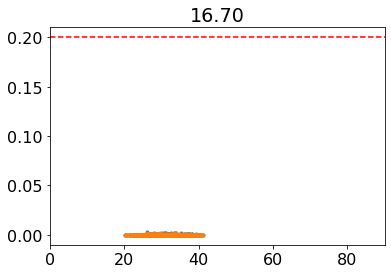

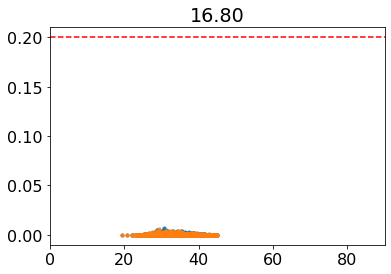

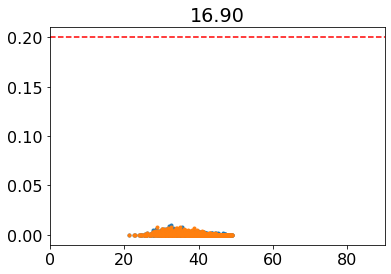

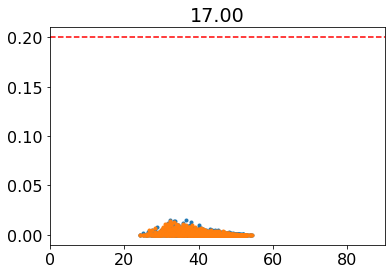

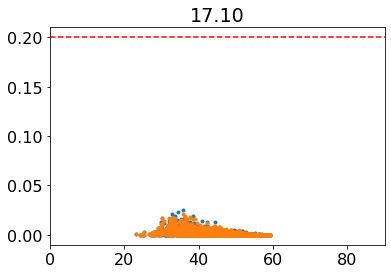

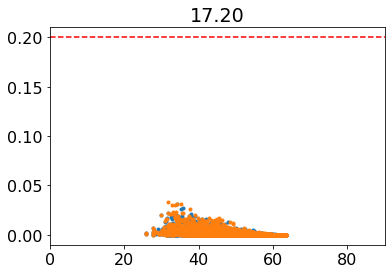

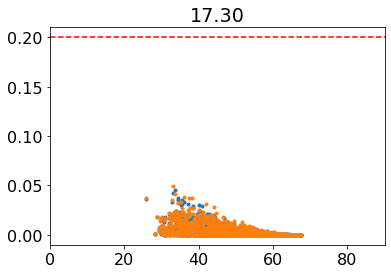

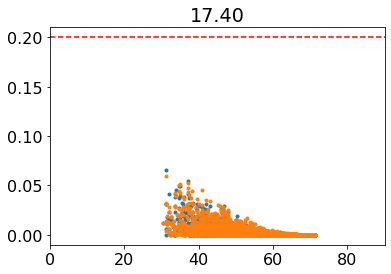

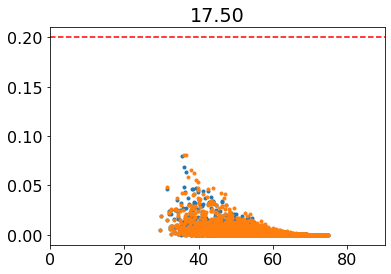

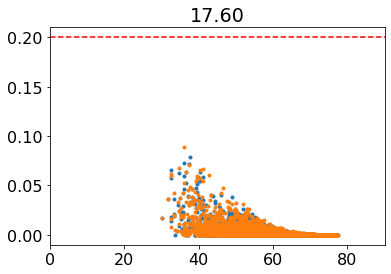

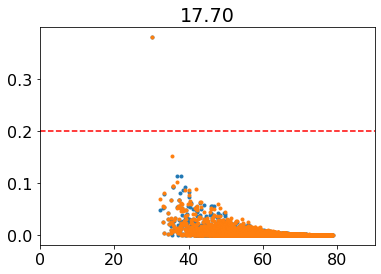

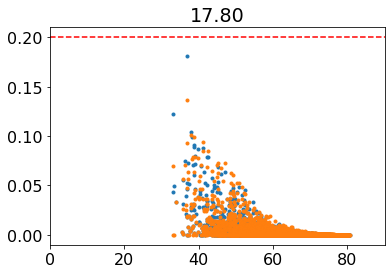

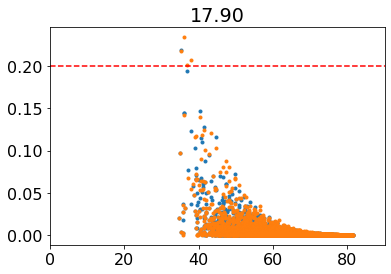

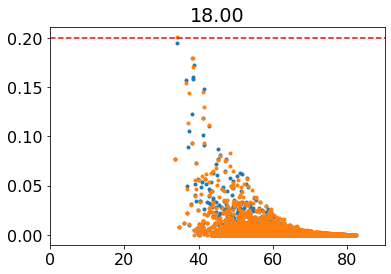

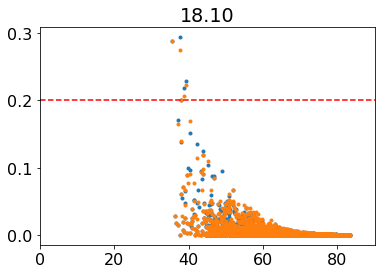

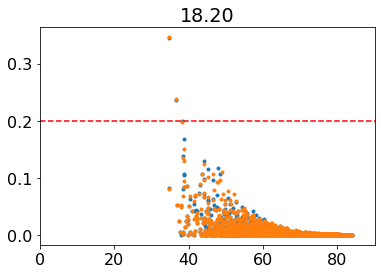

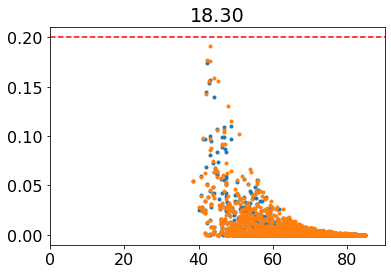

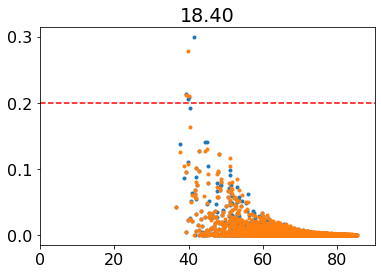

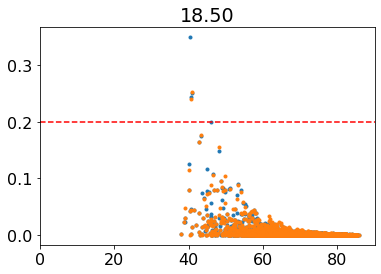

In [27]:
# Voltage SNR of 10 matches
# Need to get right filter response in there.
# Overestimating SNR
e_array = np.arange(16.6, 18.6, 0.1)
acc = np.zeros(len(e_array))
cc=-1
thz_list_of_arrays = []
for en in e_array:
    cc+=1
    rad = (10**(en-17.))**0.4
    A_0 = np.pi**2 * rad**2
    eff, thz_array, flat_res = acceptance_sim(radius_km = rad,
                         num_particles = 100000,
                         zenith_angle_deg = None,
                         log10_energy = en,
                         SNR_thresh = 5,
                         N_trig = 2,
                         trig_pol = 'hpol',
                         detector_altitude_km = 3.87553,
                         detector_mode = 'prototype_2018'
                        )
    #print flat_res
    eff_res = 0.
    try:
        figure()
        plot(thz_array, flat_res[:,0], '.')
        plot(thz_array, flat_res[:,1], '.')
        plot([0.,90.], [0.2, 0.2], 'r--')
        xlim(0., 90.)
        #ylim(0.,1.)
        title('%1.2f'%en)
        res_cut = np.logical_or(flat_res[:,0]>0.2, flat_res[:,1]>0.2)
        eff_res = np.sum(res_cut)/float(len(thz_array))
        thz_list_of_arrays.append(thz_array[res_cut])
    except:
        thz_list_of_arrays.append([-1.])
        pass
    acc[cc] = eff*A_0*eff_res
    print('%1.1f %1.1f, %1.2e %1.2e %1.2e %1.2e'%(en, rad, eff, A_0, eff*A_0, acc[cc]))

(20,)
[16.6 16.7 16.8 16.9 17.  17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9
 18.  18.1 18.2 18.3 18.4 18.5]
-4.0


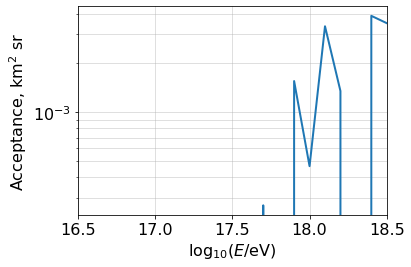

In [33]:
print(acc.shape)
print(e_array)
semilogy(e_array, 0.75*acc, lw=2)
xticks(np.arange(16.5, 18.6, 0.5))
xlabel('$\log_{10}(E/\mathrm{eV})$')
ylabel('Acceptance, km$^2$ sr')
grid(True, which='both', alpha=0.5)
xlim(16.5, 18.5)
y1, y2 = ylim()
y1 = 0.01
print(np.floor(np.log10(np.min(acc[acc>0.]))))
#ylim(10.**np.floor(np.log10(np.min(acc[acc>0.]))), y2)
#ylim(y1,y2)
tight_layout()
savefig('Acceptance.pdf')

[3.98107171e+16 5.01187234e+16 6.30957344e+16 7.94328235e+16
 1.00000000e+17 1.25892541e+17 1.58489319e+17 1.99526231e+17
 2.51188643e+17 3.16227766e+17 3.98107171e+17 5.01187234e+17
 6.30957344e+17 7.94328235e+17 1.00000000e+18 1.25892541e+18
 1.58489319e+18 1.99526231e+18 2.51188643e+18 3.16227766e+18]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00179038
 0.00179038 0.00539122 0.00602955 0.00874533 0.00938724 0.00938724
 0.01003275 0.01037605]


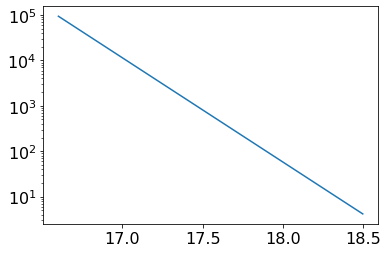

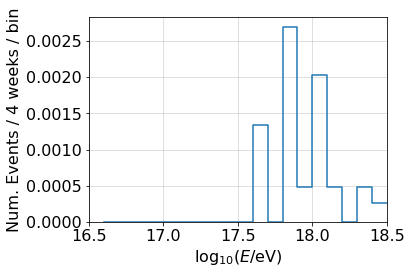

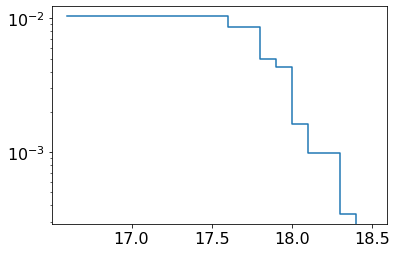

In [29]:
def flux(energy_array_eV):
    # parameterization from Auger ICRC 2017
    J0 = 2.7513872e-19 # km^-2 sr^-1 yr^-1 eV^-1
    E_ankle = 5.08e18  # eV
    E_s = 3.9e19       # eV
    gam_1 = 3.293
    gam_2 = 2.53
    dgam  = 2.5
    flux = np.ones(len(energy_array_eV))
    cut_1 = energy_array_eV<=E_ankle
    cut_2 = energy_array_eV>E_ankle

    flux[cut_1]=J0*(energy_array_eV[cut_1]/E_ankle)**-gam_1
    flux[cut_2]=J0*(energy_array_eV[cut_2]/E_ankle)**-gam_2 * (1.+(E_ankle/E_s)**dgam)/((1.+(energy_array_eV[cut_2]/E_s)**dgam))
    return flux

print(10**e_array)
flx = flux(10**e_array)

semilogy(e_array, flx*10**e_array)
T_live = 4*7*24./(365.25*24.)

figure()
plot(e_array, 0.75*flx * 10**e_array * acc * np.log(10.)*0.1 * T_live, drawstyle='steps')
xlabel('$\log_{10}(E/\mathrm{eV})$')
ylabel('Num. Events / 4 weeks / bin')
grid(True, which='both', alpha=0.5)
xlim(16.5, 18.5)
y1, y2 = ylim()
ylim(0., y2)
tight_layout()
savefig('Energy_Distrib.pdf')

d_log_10_E = 0.1
figure()
semilogy(e_array, ( np.sum(flx * 10**e_array * acc) - np.cumsum(flx * 10**e_array * acc) )*np.log(10.)* d_log_10_E * T_live, drawstyle='steps')

print(np.cumsum(flx * 10**e_array * acc)*np.log(10.)* d_log_10_E * T_live)



16.6
16.700000000000003
16.800000000000004
16.900000000000006
17.000000000000007
17.10000000000001
17.20000000000001
17.30000000000001
17.400000000000013
17.500000000000014
17.600000000000016
17.700000000000017
17.80000000000002
17.90000000000002
18.00000000000002
18.100000000000023
18.200000000000024
18.300000000000026
18.400000000000027
18.50000000000003


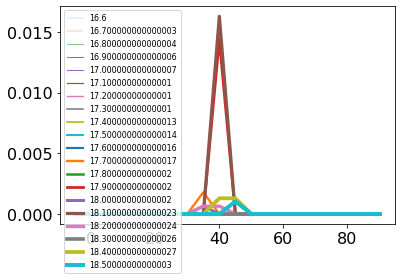

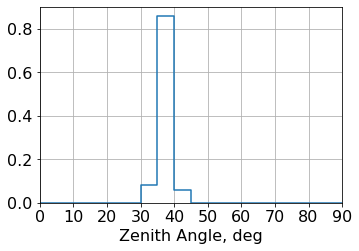

In [30]:
wh, b = np.histogram(thz_list_of_arrays[0], bins = np.arange(-10., 91., 5.))
wh = wh*0.
cc=0
for k in range(len(thz_list_of_arrays)):
    weight = flx[k] * 10**e_array[k] * acc[k] * np.log(10.)*0.1 * T_live
    h, b = np.histogram(thz_list_of_arrays[k], bins = np.arange(-10., 91., 5.))
    wh += h*weight
    plot(b[1:], h*weight, lw = (cc+1)*0.2, label=e_array[k])
    print(e_array[k])
    cc+=1
legend(loc=2, fontsize=8)
figure()
plot(b[1:], wh/np.sum(wh), drawstyle='steps')
y1, y2 = ylim()
ylim(0., y2)
xlim(0.,90.)
xticks(np.arange(0.,91.,10.))
grid(True, which='both')
xlabel('Zenith Angle, deg')
subplots_adjust(left=0.2, right=0.9, bottom=0.2)
savefig('Zenith_angle_distrib.pdf')

Text(0, 0.5, 'CDF')

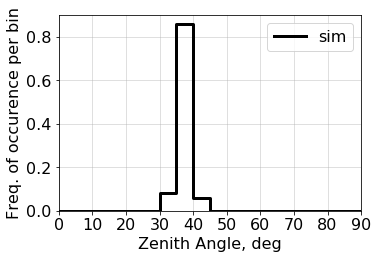

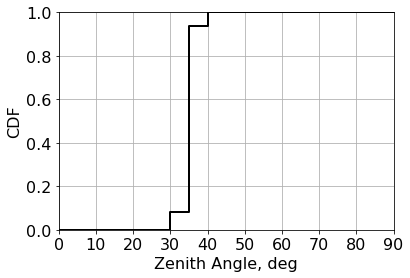

In [31]:
figure()
plot(b[1:], wh/np.sum(wh), 'k-', lw=3, drawstyle='steps', label='sim')
y1, y2 = ylim()
ylim(0., y2)
xlim(0.,90.)
xticks(np.arange(0.,91.,10.))
grid(True, which='both', alpha=0.5)
xlabel('Zenith Angle, deg')
ylabel('Freq. of occurence per bin')
subplots_adjust(left=0.2, right=0.9, bottom=0.2)
savefig('zen_angle_distrib.pdf')

#CR_vals = 90.-np.array([61.67, 47.93, 40.26, 63.76, 42.43, 63.21, 40.03, 44.30, 54.86, 48.83])
#NC_vals = 90. - np.array([20.2, 33.8])

#CR_vals = np.array([28., 41., 49., 26., 48., 26., 49., 45., 35., 41.])
#NC_vals = np.array([55., 68.])

#bar(CR_vals, 0.12*np.ones(len(CR_vals)), align='center', color='green', alpha=1.0,  label='CR')
#bar(NC_vals, 0.12*np.ones(len(NC_vals)), align='center', color='orange', alpha=1.0, label='NC')
legend()
savefig('Zenith_angle_distrib_w_data.pdf')

#measured_vals = np.concatenate([CR_vals, NC_vals])

'''%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%'''

figure()
#u = (np.cumsum(np.ones(len(CR_vals)))-1)/float(len(CR_vals)-1)
#plot(np.sort(CR_vals),u, 'gx-')

#u = (np.cumsum(np.ones(len(measured_vals)))-1)/float(len(measured_vals)-1)
#plot(np.sort(measured_vals),u, 'o-', color='orange', lw=3)

plot(b[1:], np.cumsum(wh/np.sum(wh)), 'k-', drawstyle='steps', lw=2)
ylim(0., 1.)
xlim(0.,90.)
xticks(np.arange(0.,91.,10.))
grid(True, which='both')
xlabel('Zenith Angle, deg')
ylabel('CDF')

#from scipy import stats
#tats.ks_2samp(CR_vals, rvs4)

[0.35801964 0.48387097 0.55859813 0.56219081 0.5354142  0.56972477
 0.57671233 0.56636364 0.6182716  0.58688525 0.6        0.59
 0.52727273]
0.5663636363636364


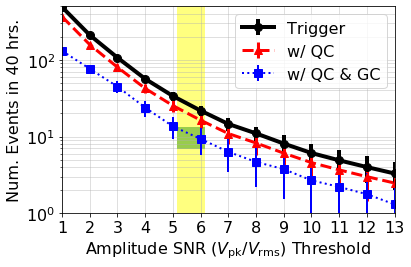

In [32]:
SNR_thresh = [1., 2., 3., 4., 5.,   6.,     7.,   8.,   9.,  10.,   11,   12 , 13]
#Num_events = [51.3, 33.1, 22.2, 16.6, 12.6, 8.95, 8.12, 5.8, 4.83]
Num_events = [488.8, 210.8, 107.0, 56.6, 33.8, 21.8, 14.6,  11.0,  8.1, 6.1,   4.9, 4.0, 3.3]
SNR_thresh_cut = [1.,   2.,    3.,   4.,   5.,  6., 7.,     8.,  9.,    10.,  11.,   12., 13.]
#Num_events_cut = [17.5, 11.05, 7.73, 5.71, 4.34, 3.5, 2.72, 2.02, 1.74, 1.39, 1.18, 1.03, 0.81  ]
Num_events_cut = [175., 102., 59.77, 31.82, 18.097, 12.42, 8.42, 6.23, 5.008, 3.58, 2.94, 2.36, 1.74  ]


#Num_events_cut = 0.75*np.array(Num_events_cut)
Num_events_cut = np.array(Num_events_cut)
Num_events = np.array(Num_events)

print(Num_events_cut / Num_events)
print(np.median(Num_events_cut / Num_events))

ax = subplot(111)
ax.set_yscale('log')
#plot(SNR_thresh, Num_events, 'ko-', label='Trigger')
#plot(SNR_thresh, 0.75*Num_events, 'bo--', label='Trigger')
#plot(SNR_thresh_cut, 0.75*Num_events_cut, 'rs:', label='With Power\nin Gaussian Cut')
#plot(SNR_thresh_cut, Num_events_cut, 'rs--', label='With Power\nin Gaussian Cut')
errorbar(SNR_thresh_cut, Num_events, yerr = np.sqrt(Num_events_cut), fmt='ko-', lw=4, ms=8, label='Trigger')
errorbar(SNR_thresh_cut, 0.75*Num_events, yerr = np.sqrt(Num_events_cut), fmt='r^--', lw=3, ms = 8, label='w/ QC')
errorbar(SNR_thresh_cut, 0.75*Num_events_cut, yerr = np.sqrt(Num_events_cut), fmt='bs:', lw=2, ms = 8, label='w/ QC & GC')
#errorbar(SNR_thresh_cut, Num_events, yerr = np.sqrt(Num_events), fmt='ko-')
#fill_between([1.5, 3.5], 1., 500., facecolor='yellow', alpha=0.5)
#fill_between([1.5, 3.5], (10.-np.sqrt(10.)), (10.+np.sqrt(10.)), facecolor='green', alpha=0.4)
fill_between([5.66-0.5, 5.66+0.5], 1., 500., facecolor='yellow', alpha=0.5)
fill_between([5.66-0.5, 5.66+0.5], (10.-np.sqrt(10.)), (10.+np.sqrt(10.)), facecolor='green', alpha=0.4)
xlabel('Amplitude SNR ($V_\mathrm{pk}/V_\mathrm{rms}$) Threshold')
ylabel('Num. Events in 40 hrs.')
legend(loc=0)
#savefig('')
ylim(1., 500.)
#yticks(np.arange(0.,60.1,5.))
xticks(np.arange(1.,13.1, 1.))
xlim(1., 13.)
grid(True, alpha=0.5, which='both')
tight_layout()
savefig('Num_events.pdf')